# Tomography Fitter

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from trott import *
import numpy as np
import itertools

## Prepare Circuits

In [7]:
trott_gate = gen_3cnot_trott_gate() # using the basic trott method (this can be changed)x
trott_steps_range = np.arange(4,25,1)
qcs = gen_st_qcs_range(trott_gate, trott_steps_range)
# qcs[10][-2].draw() # e.g. 10 trott steps, example tomo circuit

## Prepare Backend

In [8]:
# load IBMQ Account data
# IBMQ.save_account(TOKEN)  # replace TOKEN with your API token string (https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq)
provider = IBMQ.load_account()

In [9]:
# Get backend for experiment
provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')
jakarta = provider.get_backend('ibmq_jakarta')
# properties = jakarta.properties()

# Simulated backend based on ibmq_jakarta's device noise profile
sim_noisy_jakarta = QasmSimulator.from_backend(provider.get_backend('ibmq_jakarta'))

# Noiseless simulated backend
sim = QasmSimulator()

## Capture Data

In [10]:
results = gen_results(qcs, backend=sim)

  0%|                                                                        | 0/21 [00:00<?, ?it/s]

Running with trott_steps = (4, 0)
Job ID 5dd56227-757a-4feb-b977-a2dd240180f0
Job ID b1762801-813b-4647-918f-dfa70b88886e
Job ID 645cef53-66c3-437b-9002-6503478941c6
Job ID 8efb2aa3-6b97-4aec-bd6c-c410cffb5900
Job ID d015a838-6d7a-4d65-9bf9-3a077927c425
Job ID 8b943b27-666e-495a-bf86-a9e838ebe16f
Job ID df2a16a0-8da5-4031-a6af-c85000509cd4
Job ID 515c8224-ce38-4ca8-8c1c-768c2980de99
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

  5%|███                                                             | 1/21 [00:08<02:49,  8.48s/it]

Job Status: job has successfully run
Running with trott_steps = (5, 0)
Job ID b212e813-e5d8-45c2-acfb-12686ed1afbc
Job ID 7749eaca-de91-4915-be88-a8565f5a8ea2
Job ID adbbed05-2d5d-43c6-8f84-2b6236ffd48f
Job ID 970b33e6-58c9-41ce-b5e3-a07a54caa3b8
Job ID b28987c2-6f7f-47a5-ba5c-d14585d66db8
Job ID a5d69bc9-2f0e-4225-b6d1-cf331253009a
Job ID 714f05b3-46dd-4cb5-b0da-09f90ad144fa


 10%|██████                                                          | 2/21 [00:12<01:46,  5.59s/it]

Job ID 9e641c6b-ec5f-4cc9-88b8-bfb2c1c59254
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Running with trott_steps = (6, 0)
Job ID 4a0c5bae-bec2-4428-9c9c-8da7cf8cfeb7
Job ID b608332e-924e-4f6f-a8e3-1efa74748a10
Job ID 5a2e075f-32f0-4878-b12c-e23fb22281a7
Job ID d50ba4ad-69d9-4a57-b578-1650087c7deb
Job ID 25a1b62b-f4b9-4e95-aa75-f097c5d32fa6
Job ID 1e6a1c4b-f7ed-4b93-8c85-f5ce5641e10b
Job ID ae74d1d7-cf1d-4d47-8f23-03bf0e5bc860
Job ID 738ccd1f-183a-4b5d-8133-fec3151407e1
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job

 14%|█████████▏                                                      | 3/21 [00:21<02:09,  7.19s/it]

Job Status: job has successfully run
Running with trott_steps = (7, 0)
Job ID 157fc97b-d837-4c72-96d9-1b2e1134b70a
Job ID cb9c71fb-b817-4d14-8cb3-d5ef58d32fba
Job ID 5e6e7f27-9dfa-4e13-8572-8b73cc79a15d
Job ID 7c86bd80-aa7f-4c81-9979-180711cd619e
Job ID e4ba335d-6406-43a5-8c05-dc2a2f067726
Job ID cadfe865-2cce-467b-b569-0ef8bd842083
Job ID 45fb24df-ccff-4de6-be08-8fdcf8be34a3
Job ID 558ac514-1f81-4ff2-a613-0aa7cf65654b
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 19%|████████████▏                                                   | 4/21 [00:30<02:18,  8.12s/it]

Job Status: job has successfully run
Running with trott_steps = (8, 0)
Job ID 6432d4e1-421c-4418-ba56-27385ba5b647
Job ID d2660ed9-d7c3-4326-922b-a9164836fe0a
Job ID 728dfd44-496f-4cc2-945c-99713037b636
Job ID 64a7d825-5204-4fb7-a212-bfba250c4e52
Job ID 3e59118d-3f48-436a-82b3-ed13ae1d8d02
Job ID 23868726-93c9-455e-bf79-2d8bf52ff2c2
Job ID 438e9483-da7e-463f-b0bf-a5b666179db4
Job ID de1bb4c9-1566-47a6-b410-a6583311a240
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 24%|███████████████▏                                                | 5/21 [00:40<02:22,  8.88s/it]

Job Status: job has successfully run
Running with trott_steps = (9, 0)
Job ID cc68aaed-a899-4471-8273-afb09b926790
Job ID f6b25d47-875c-453c-b2d0-eb7af6123a73
Job ID 11a4a4f1-cddf-4d82-9dd8-63752255b0b1
Job ID b994f136-7568-4962-a53c-6d1f63933c7e
Job ID 8b99046f-e635-43b9-ad88-c13404b65bd6
Job ID 02e12f02-9573-4509-af7f-70fe510f60fa
Job ID a2f2e890-34e3-4f2f-85e9-12daec57772b
Job ID e026b081-4f8d-4ba2-ae78-03bc9f66edec
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 29%|██████████████████▎                                             | 6/21 [00:51<02:20,  9.39s/it]

Job Status: job has successfully run
Running with trott_steps = (10, 0)
Job ID 760f4857-7426-4250-a0af-920f69e0649d
Job ID 1cfe166f-a4a8-4e02-8332-4587a64df12f
Job ID 419351d2-fcb9-4046-bf74-791afb518f9d
Job ID b73949d3-7558-412f-ac15-01d52abe3d89
Job ID fe1aa978-21a1-4038-823a-4e92b95fc50a
Job ID 0bac24be-ef82-4d29-827e-0e81970afa7a
Job ID 5f444f94-d552-48b8-9c14-4b576cf97464
Job ID f7ab3bf6-db8b-49b8-b766-ea309f5d2625
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 33%|█████████████████████▎                                          | 7/21 [01:02<02:17,  9.84s/it]

Job Status: job has successfully run
Running with trott_steps = (11, 0)
Job ID bcc4e34c-1c42-4aac-a711-2cf2344d25fc
Job ID 93fbd6c9-e178-4fc9-aff8-7f7ec00ced81
Job ID fa513285-def6-4ae9-a740-26944f61d426
Job ID 1c830cea-6bd0-4dbf-8f21-09d64f376b4d
Job ID 22d79495-f93d-4f25-9db9-daa1d78f81b5
Job ID 772a28c2-1218-4632-a6fa-b4d9e427f572
Job ID 24852633-a65f-4c93-a27e-b89082b10903
Job ID ad9982b7-e0b8-4143-924a-7fc7bb925b8d
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 38%|████████████████████████▍                                       | 8/21 [01:13<02:14, 10.33s/it]

Job Status: job has successfully run
Running with trott_steps = (12, 0)
Job ID 9c4b6187-7b0b-4360-945b-5bf6561a4b3b
Job ID 919c302f-760d-4d30-b23d-213bf1ad7c9a
Job ID ff5b11af-2847-4aae-bda0-e080112d1b21
Job ID 1bb54b68-441b-4a22-ae23-9f3770dffeeb
Job ID 297b1605-6202-4e58-af88-e372cb1787ef
Job ID a6d4bc71-65e0-48f5-bac4-835e51621428
Job ID 98e6032a-40f5-4f85-ad38-ddfbfbc8927a
Job ID be030215-802b-4378-a034-d20d16685753
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 43%|███████████████████████████▍                                    | 9/21 [01:25<02:10, 10.89s/it]

Job Status: job has successfully run
Running with trott_steps = (13, 0)
Job ID bf7ed286-c249-4947-87a0-12eec5684bd0
Job ID 86d478e9-79ef-48cf-b1f4-5093767e22de
Job ID 042b2b4b-59c4-40ae-8567-e770ae9484ee
Job ID 6daffff2-2338-47cc-a37d-ebe2f876a70a
Job ID 564ee1b1-5624-4e81-87ae-521aaabbd1fc
Job ID 560a0952-89d6-43a4-86c2-02be94b8b9c0
Job ID 62f17825-67d9-4769-a344-c9705696d3e5
Job ID 8209a35b-59ab-4e9d-9f1a-d9befca37827
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 48%|██████████████████████████████                                 | 10/21 [01:38<02:05, 11.44s/it]

Running with trott_steps = (14, 0)
Job ID 8faafa62-3419-4410-b5c6-a4e0843dc75d
Job ID a041cc50-f69d-48e1-8240-63a6f034a1c0
Job ID a7326e88-2536-4812-857f-a006deec8f48
Job ID af8f1ca4-7006-4897-8a00-8b121628454e
Job ID 8b9625b0-9193-41b1-b35d-2908a8442c28
Job ID 10a26f1c-2e47-4f70-a2e9-6e4540d6f8da
Job ID 2069dfc4-3c68-4786-90af-8504e35c0cc5
Job ID 3295fa9d-0670-4388-9f59-4694ed5fb69a
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 52%|█████████████████████████████████                              | 11/21 [01:51<01:59, 11.95s/it]

Job Status: job has successfully run
Running with trott_steps = (15, 0)
Job ID 1a00ccda-c2ee-46e0-a82d-6b41314f0925
Job ID c1cffe76-90be-49b8-a655-3fe52d61c2c5
Job ID a9f6a26e-466b-4b03-92c2-1612a642443a
Job ID d5ff039e-1cbb-480d-86dd-876521adec81
Job ID 856b8a7d-47f4-44de-9f30-5b2c5711b806
Job ID fb701a3a-c56e-42bb-aac9-fc85457707d5
Job ID 27b16274-f6ea-4f8f-8281-72eb341044e0
Job ID 3720a9a1-9bd5-4b0b-81f0-9d6569634b15
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 57%|████████████████████████████████████                           | 12/21 [02:04<01:51, 12.36s/it]

Job Status: job has successfully run
Running with trott_steps = (16, 0)
Job ID 88bc60c2-0e0c-45bb-a66e-7c4e2bec1a05
Job ID 7577d7a9-b3bd-44b4-a31f-1e19cc0d7a95
Job ID 41f4a587-1da4-43b9-9471-de97c27cbefa
Job ID 448c496c-1888-4b11-aca3-3a13e4265439
Job ID 398de74f-342a-411e-82f1-ec0d210ec8ad
Job ID 6b1b1e74-9142-4959-b30b-f4fb21842661
Job ID f5e7e3e8-0c3e-4853-b829-c5ba6c818eb1
Job ID 18d39591-02e1-4c64-8022-4560a98ad3ab
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 62%|███████████████████████████████████████                        | 13/21 [02:18<01:42, 12.84s/it]

Job Status: job has successfully run
Running with trott_steps = (17, 0)
Job ID 94f65cfe-edb5-41b2-af69-a2fe8a4473f3
Job ID e1643c90-7ab5-4b41-9065-f826a51bd10a
Job ID 080499f1-b879-4108-ab6e-a2d49c00fb5f
Job ID 6f423507-e10b-4f1c-a233-561309bf3ccc
Job ID fe5016f2-c693-4e86-a1d0-5e2f3ebd42e6
Job ID 47f7c874-7caf-4638-8126-b0c1bdcc33d6
Job ID 7b7434d2-926e-4243-8440-b2958a9731dd
Job ID 755023dd-8c13-44d7-b3d3-c0d3ef0385f5
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 67%|██████████████████████████████████████████                     | 14/21 [02:33<01:33, 13.33s/it]

Job Status: job has successfully run
Running with trott_steps = (18, 0)
Job ID 01ace8f9-5aa8-494a-ac4a-465c4b08b2f2
Job ID cc8107ea-c43a-4c20-9fa9-9b13cd78dd54
Job ID 603b7e8a-2fc9-4bab-a7f2-6082ad04ce9d
Job ID 37670a13-c65e-4617-afab-ac23362f1c84
Job ID 87e6fe79-bacc-4ea8-a1f7-786b7ecb8c2b
Job ID 7b3bcbfa-80e6-4a4b-8c92-85587e550c31
Job ID 71559cb8-72d8-4cc0-a483-facb55a08d6f
Job ID 1b778791-ad45-4d52-939a-a52d7b3c8ad7
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 71%|█████████████████████████████████████████████                  | 15/21 [02:47<01:22, 13.76s/it]

Job Status: job has successfully run
Running with trott_steps = (19, 0)
Job ID e13c2ff4-a5cb-48e2-afdd-47d66997e89d
Job ID bd47a5ec-b962-41e4-82b5-6efb4b9c0b07
Job ID fe293c83-22ed-447f-9c9e-739526c683bc
Job ID 65d23ba2-baa5-4a74-8cc7-a2f763d8fc02
Job ID 8a503a40-6588-4d7a-b4b9-dbe0d182e124
Job ID 121094f4-31b5-43d3-a2fe-2620c8dd0e0d
Job ID a8f8099b-6de0-44b7-a695-3f1bbeb3fef7
Job ID 4a15f23a-ccd7-4a57-a472-678931c49ccd
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 76%|████████████████████████████████████████████████               | 16/21 [03:03<01:11, 14.32s/it]

Job Status: job has successfully run
Running with trott_steps = (20, 0)
Job ID c6531d7e-467e-4405-b0f1-271606658017
Job ID 6cd3d848-3ec4-47a1-885a-add620e1a934
Job ID 5805452c-b050-4331-83ea-504da913b29a
Job ID 7f4676cf-1fae-4d45-91b2-a4932f9ad4ad
Job ID f212b4b7-0f03-4a04-aa75-8aab9456eec2
Job ID 0b211582-fa2e-4706-9753-99ec24ed365c
Job ID 5d3a0e73-1588-4793-a8bc-b5c5e53d903b
Job ID e4956cef-77fc-43e4-be94-71f2d5d79706
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 81%|███████████████████████████████████████████████████            | 17/21 [03:19<00:59, 14.86s/it]

Job Status: job has successfully run
Running with trott_steps = (21, 0)
Job ID 37c9af74-2737-4f98-b92d-7031a1be8f5b
Job ID 32a4d6be-2f5e-40e6-858f-2a89f7c40067
Job ID 69a6a8a5-e262-4573-91f1-ea180b97b3dc
Job ID 5544ee75-f537-4f14-b34e-dcda0cc872c6
Job ID 34a1cbda-387d-420a-99f7-188e77cf8545
Job ID 60a8fc77-dda0-4790-b2f3-223554fe89db
Job ID fdbbd9cb-63e5-4956-aba8-e2e55d8a50ac
Job ID fffd8eae-87ed-4188-b5ff-842bf6cdab98
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 86%|██████████████████████████████████████████████████████         | 18/21 [03:36<00:46, 15.47s/it]

Running with trott_steps = (22, 0)
Job ID 22bb49cd-7c96-44be-ab8c-1aa3b0c6f55b
Job ID 5898630e-c317-4930-abf6-cb4b1dd60f8f
Job ID 4f9c92a5-2ccf-4d86-bbd9-6ace3f3d00b9
Job ID 0cbb0625-cbab-4c58-9c0d-5e839b68151f
Job ID 0f7c71b5-809c-4fb1-969a-da956373ab91
Job ID 8b140813-b1bc-4549-977e-2506382bdc0d
Job ID 87c1955d-07f6-473e-ba2c-3786c837c8cd
Job ID 6e34d52d-b576-4a23-9d44-0f0ff418f7de
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 90%|█████████████████████████████████████████████████████████      | 19/21 [03:53<00:31, 15.96s/it]

Running with trott_steps = (23, 0)
Job ID 3e4577e1-d505-49ce-8bf6-d19744338cae
Job ID 75758bfa-4672-47fd-8800-3a1e0caa397f
Job ID b8f60c14-994a-4c06-b7a5-490a95a05c2e
Job ID 9310d8a1-0bf3-4f29-938e-fb43cf7c72ec
Job ID ebcc0fcb-85bd-473d-bb8a-d27eb4c4bad2
Job ID 407a0b45-259e-4cd2-814c-8f755320d618
Job ID a14e4417-4e33-4062-977e-a81cf9a73e93
Job ID 4860f79d-7aef-491e-8110-6201a2064cdc
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 95%|████████████████████████████████████████████████████████████   | 20/21 [04:11<00:16, 16.43s/it]

Running with trott_steps = (24, 0)
Job ID 07fb4721-cb4c-4084-ac00-2d627f58733f
Job ID f7748f85-ed46-48fd-870e-e83dab1441b0
Job ID d871f175-c7bf-4f7e-8cfc-6aca0916ef87
Job ID 37fa7cbf-0c81-4022-80d2-30aa77e7fa24
Job ID 5248994e-b1d7-4a0d-88c0-6d0c08032a4d
Job ID e2274f96-5970-4bf6-b8be-45b1c485fa6e
Job ID 0b9e2541-2eb2-4fc5-be0b-b26a8ca271d5
Job ID 5ab76028-aecf-49c4-bf51-c3e9bed0b9ea
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


100%|███████████████████████████████████████████████████████████████| 21/21 [04:29<00:00, 12.82s/it]


In [11]:
res_analysis = run_analysis(results, unitary_folding=False) 

## Original Data Map

In [20]:
test_og = res_analysis["data"][(19, 0)]["data_map"]["ZZZ"]
norm = np.sum(list(test_og.values()))
test_og = {key:val/norm for key, val in test_og.items()}
test_og

{'0x3': 0.0033111572265625, '0x5': 0.0010833740234375, '0x6': 0.99560546875}

In [40]:
example_parity_results = res_analysis["data"][(19, 0)]["parity"]
prob_results = parity2prob(example_parity_results, return_probs=False)

In [68]:
prob_results

{'XXX': {'111': 125,
  '011': 118,
  '101': 132,
  '001': 124,
  '110': 124,
  '010': 131,
  '100': 118,
  '000': 125},
 'XXY': {'111': 135,
  '011': 108,
  '101': 142,
  '001': 113,
  '110': 114,
  '010': 141,
  '100': 106,
  '000': 136},
 'XXZ': {'111': 241,
  '011': 1,
  '101': 256,
  '110': 256,
  '010': 0,
  '100': 242,
  '000': 1},
 'XYX': {'111': 120,
  '011': 114,
  '101': 136,
  '001': 128,
  '110': 128,
  '010': 135,
  '100': 114,
  '000': 121},
 'XYY': {'111': 131,
  '011': 104,
  '101': 147,
  '001': 118,
  '110': 116,
  '010': 147,
  '100': 104,
  '000': 131},
 'XYZ': {'111': 233,
  '011': 1,
  '101': 264,
  '001': 0,
  '110': 263,
  '010': 0,
  '100': 235,
  '000': 0},
 'XZX': {'111': 256,
  '011': 243,
  '101': 0,
  '001': 0,
  '110': 241,
  '010': 257,
  '100': 0},
 'XZY': {'111': 277,
  '011': 221,
  '101': 0,
  '001': 0,
  '110': 221,
  '010': 277,
  '000': 0},
 'XZZ': {'111': 498, '011': 0, '001': 0, '110': 496, '010': 2, '100': 1},
 'YXX': {'111': 117,
  '011': 147,

## Tomography MLE

In [42]:
# Importing standard Qiskit modules
from qiskit import QuantumCircuit, QuantumRegister, IBMQ, execute, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor
from qiskit.circuit import Parameter, Instruction
from qiskit.quantum_info import Pauli, DensityMatrix, Statevector, partial_trace

# Import state tomography modules
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.ignis.verification.tomography.fitters.lstsq_fit import lstsq_fit, make_positive_semidefinite
from qiskit.ignis.verification.tomography.fitters.cvx_fit import cvx_fit

from qiskit.quantum_info import state_fidelity
from qiskit.opflow import Zero, One, I, X, Y, Z

In [43]:
target_state, target_parity = gen_target()

### (a) Direct Simulation of Trotter Gates

In [44]:
def gen_qc(trott_gate: Instruction, trotter_steps: int):
    """
    Args:
        n (int): number of trotter steps
    """
    
    t = trott_gate.params[0] # assuming only t param
    
    target_time = np.pi
    
    qr = QuantumRegister(7)
    qc = QuantumCircuit(qr)
    
    qc.x([3,5]) # prepare init state |q5q3q1> = |110>
    
    
    # Create dummy circuit
    qc_dummy = QuantumCircuit(qr)
    
    for _ in range(trotter_steps):
        qc_dummy.append(trott_gate, [qr[1], qr[3], qr[5]])
    
    # Decompose dummy circuit into native gates and append to qc
    qc = qc + qc_dummy.decompose().decompose()
    
    # Bind timestep parameter
    qc = qc.bind_parameters({t: target_time/trotter_steps})
    
    return qc

In [45]:
qc_steps = {}
for step in trott_steps_range:
    qc_steps[step] = gen_qc(trott_gate, step)

In [46]:
v = partial_trace(Statevector(qc_steps[19]), [0, 2, 4, 6])

state_fidelity(v, target_state)

0.9957862389609095

### (b) MLE: Fitting via Parity Expectation Values

In [89]:
basis_matrix = []
data = []

for pauli, val in example_parity_results.items():
    ### Parity "XYZ" > actual order "ZYX" > vectorize to get |ZYX⟩⟩ > conjugate ket to its dual
    row = Pauli(pauli[::-1]).to_matrix().flatten(order='F').conjugate()
    basis_matrix.append(row)
    data.append(val)

basis_matrix = np.array(basis_matrix)

In [90]:
# Only CVX works here; lstsq still has issues! Also we need to enforce PSD / unit trace
rho_fit = cvx_fit(data=data, basis_matrix=basis_matrix, trace=1, psd=True)
rho_fit = make_positive_semidefinite(rho_fit) 
rho_fit *= 1 / np.trace(rho_fit)

In [91]:
state_fidelity(rho_fit, target_state)

0.9938192010199804

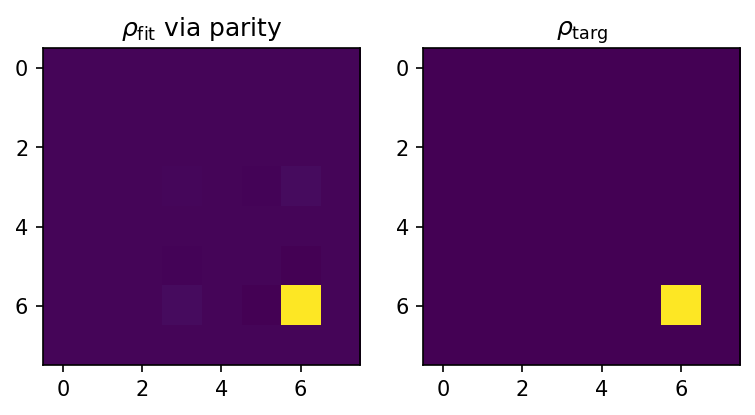

In [92]:
fig, ax = plt.subplots(1, 2, dpi=150)

ax[0].imshow(np.real(rho_fit))
ax[1].imshow(np.real(target_state))
ax[0].title.set_text(r"$\rho_{\rm fit}$ via parity")
ax[1].title.set_text(r"$\rho_{\rm targ}$")

#### Fitting Paulis using `fit_pauli_exp_vals` directly

In [102]:
ρ = ctf.fit_pauli_exp_vals(example_parity_results, trace=1, psd=True)

In [103]:
state_fidelity(ρ, target_state)

0.9938192010199804

### (c) MLE: Fitting via Measured Probability Distribution

In [51]:
from ast import literal_eval
from qiskit import QiskitError
from qiskit import QuantumCircuit
from qiskit.ignis.verification.tomography import marginal_counts, count_keys, combine_counts
from tomography import CustomTomographyFitter

In [53]:
# Parsing the counts ourselves, though CustomTomographyFitter can get it directly from results
ct_data = {}

for circuit in qcs[(19, 0)]:
    counts = None
    for result in res_analysis["data"][(19, 0)]["raw_data"]:
        counts = result.get_counts(circuit)
        
        # should be inside for loop to sum over results?
        if counts is None:
            raise QiskitError("Result for {} not found".format(circ.name))
        if isinstance(circuit, str):
            pauli_tup = literal_eval(circuit)
        elif isinstance(circuit, QuantumCircuit):
            pauli_tup = literal_eval(circuit.name)
        else:
            pauli_tup = circuit
        if pauli_tup in data:
            ct_data[pauli_tup] = combine_counts(data[pauli_tup], counts)
        else:
            ct_data[pauli_tup] = counts

In [54]:
ctf = CustomTomographyFitter(ct_data)

In [83]:
rho_fit_prob = ctf.fit(method='cvx', trace=1, psd=True)
rho_fit_prob = make_positive_semidefinite(rho_fit_prob)
rho_fit_prob *= 1 / np.trace(rho_fit_prob)

In [84]:
state_fidelity(rho_fit_prob, target_state)

0.9959718192793845

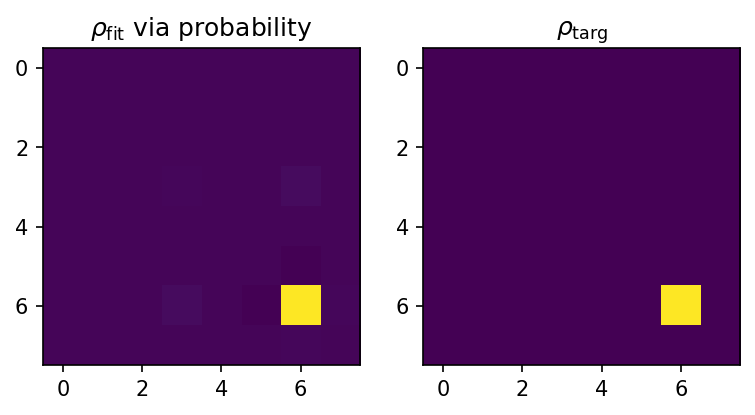

In [57]:
fig, ax = plt.subplots(1, 2, dpi=150)

ax[0].imshow(np.real(rho_fit_prob))
ax[1].imshow(np.real(target_state))
ax[0].title.set_text(r"$\rho_{\rm fit}$ via probability")
ax[1].title.set_text(r"$\rho_{\rm targ}$")

### (d) Fitting via Reconstructed Probabilities

In [69]:
ctf2 = CustomTomographyFitter(prob_results)

In [70]:
rho_fit_parity2prob = ctf.fit(method='cvx', trace=1)
rho_fit_parity2prob = make_positive_semidefinite(rho_fit_parity2prob)
rho_fit_parity2prob *= 1 / np.trace(rho_fit_parity2prob)

In [71]:
state_fidelity(rho_fit_parity2prob, target_state)

0.9959718192793845

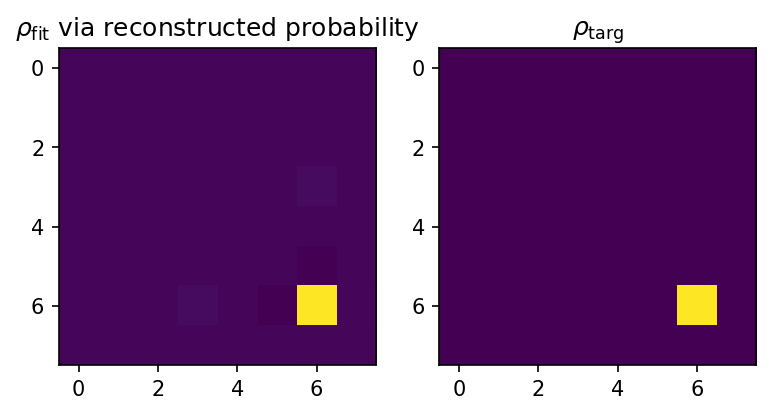

In [67]:
fig, ax = plt.subplots(1, 2, dpi=150)

ax[0].imshow(np.real(rho_fit_parity2prob))
ax[1].imshow(np.real(target_state))
ax[0].title.set_text(r"$\rho_{\rm fit}$ via reconstructed probability")
ax[1].title.set_text(r"$\rho_{\rm targ}$")

In [ ]:
ctf = CustomTomographyFitter(ct_data)

In [ ]:
data, basis_matrix, weights = ctf._fitter_data(standard_weights=True, beta=0.5)